# Assignment 5

### Instructions

* Write your code in the cells provided.  Where appropirate, enter markdown to answer questions.

* Submit this notebook to owl.

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)
from IPython.display import display

%matplotlib inline

### You're a Data Scientist...Which is Just a Statistician on a Mac, Right?

Your models from the last assignment really impressed some of the management in your football club.  In the spirit of Moneyball (it was a book before it was a movie, I recomend you read it), managers want to test some hypotheses relating a player's overall rating and some of their characteristics in order to make better decisions on what players to trade/sign.

Management heard somewhere on the internet that statistics and data science are more or less the same thing (the truth of this is the subject of many debates) and would now like you to create some *statistical models* for inference instead of prediction.

In this assignment, you're going to take off your "data" hat and put on your "science" hat.

### The Dataset

To test some of the management's hypotheses, the football club has spent some money to go out and collect new data in `footballer_sample.csv`.  The variables are more or less the same from the previous dataset.

The data contain 52 columns, including some information about the player, their skills, and their overall measure as an effective footballer.

Most features relate to the player's abilities in football related skills, such as passing, shooting, dribbling, etc.  Some features are rated on a 1-5 scale (5 being the best), others are rated on 0-100 (100 being the best), and others still are categorical (e.g. work rate is coded as low, medium, or high).

The target variable (or $y$ variable, if you will) is `overall`.  This is an overall measure of the footballer's skill and is rated from 0 to 100.  The most amazingly skilled footballer would be rated 100, where as I would struggle to score more than a 20. The model(s) you build should use the other features to predict `overall`.



### Part A

Read in the data and take a look at the dataframe.  There should be 52 columns. The outcome of interest is called `overall` which gives an overall measure of player performance. Not all of the other columns are particularly useful for modelling though (for instance, `ID` is just a unique identifier for the player.  This is essentially an arbitrary number and has no bearing on the player's rating).

Remember that the Senior Data Scientist from the last assignment thinks the following columns should be removed:

* ID
* club
* club_logo
* birth_date
* flag
* nationality
* photo
* potential


That still sounds like a pretty good idea.  Remove those columns.  Keep the categorical variables as they are encoded.  Statsmodels will automatically dummy encode them for us

In [3]:
#read the data
df = pd.read_csv("sampled_footballers.csv")
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data.head()

model_data


,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20,175.0,70.0,58,65,30,38,56,60,53,1,3,3,Medium,High,Right,55,27,53,33,26,63,33,32,27,41,68,62,54,55,75,27,55,62,47,30,54,60,54,40,45,43,53,70
1,29,183.0,80.0,65,83,62,58,64,55,80,1,2,3,High,High,Right,63,59,64,62,55,62,46,59,43,64,81,85,73,68,65,70,75,90,77,59,78,53,60,61,68,65,52,56
2,35,183.0,78.0,67,46,66,63,66,50,71,1,3,3,High,Low,Right,51,67,69,69,61,65,63,65,64,66,34,55,78,66,51,65,72,54,80,63,67,59,70,64,67,65,45,43
3,24,178.0,72.0,69,77,69,48,70,21,39,1,3,3,Medium,Medium,Right,49,70,67,62,66,67,37,43,39,68,71,81,91,70,78,68,28,34,34,70,59,25,73,34,59,54,11,17
4,23,173.0,73.0,70,79,64,64,72,21,55,1,3,3,Medium,Medium,Right,66,66,58,68,64,70,46,48,59,71,76,82,79,68,78,65,34,69,57,59,36,19,67,66,63,63,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21,190.0,90.0,69,68,43,53,51,68,73,1,2,3,Medium,High,Right,36,46,62,62,33,45,40,36,65,57,67,68,54,69,58,47,80,61,85,38,58,70,28,53,44,62,67,69
496,25,185.0,86.0,71,44,41,55,47,73,70,1,2,3,Medium,High,Right,55,37,75,62,41,44,45,47,61,49,45,44,41,71,49,55,61,55,82,38,59,62,31,42,52,72,77,75
497,22,177.0,70.0,65,67,53,59,66,55,64,1,2,4,Medium,Medium,Right,42,45,54,68,48,64,45,66,64,68,66,67,68,68,70,69,54,72,61,56,62,65,57,56,51,57,44,61
498,27,189.0,87.0,73,73,69,67,72,49,73,1,1,3,Medium,Medium,Right,8,29,12,12,13,13,14,13,11,23,51,48,48,73,51,15,70,33,67,16,24,24,15,26,14,19,13,14


### Part B

In statistics, it is useful to *standardize* our data to have mean 0 and standard deviation 1.  This has the effect of putting all the variables on the same scale.  It also has the added benefit of easing the interpretation of the coefficients to the following:

>Every 1 standard deviation change in the predictor $x$ results in a change of $\beta$ in the outcome.

Here, $\beta$ is the coefficient from the linear model we fit to the data. Standardize all the numeric variables.  A good way to check that you've done this correctly is to compute the means (which should be close to 0) and the standard deviations (which should be close to 1).

In [4]:

from sklearn import preprocessing

model_data = pd.get_dummies(model_data, drop_first=True)

cols = model_data.columns

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(model_data)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized



,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_Low,work_rate_att_Medium,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Right
0,0.15,0.314286,0.333333,0.279070,0.546875,0.140845,0.229508,0.459016,0.628571,0.385965,0.0,0.666667,0.50,0.640000,0.258824,0.545455,0.297297,0.271605,0.686747,0.320513,0.307692,0.213333,0.407407,0.688312,0.582278,0.506494,0.392857,0.753425,0.197368,0.409091,0.620253,0.357143,0.317073,0.5000,0.679012,0.574713,0.385714,0.493333,0.373333,0.597561,0.790123,0.0,1.0,0.0,0.0,1.0
1,0.60,0.542857,0.611111,0.441860,0.828125,0.591549,0.557377,0.590164,0.557143,0.859649,0.0,0.333333,0.50,0.746667,0.635294,0.670455,0.689189,0.629630,0.674699,0.487179,0.653846,0.426667,0.691358,0.857143,0.873418,0.753247,0.625000,0.616438,0.763158,0.712121,0.974684,0.785714,0.670732,0.8000,0.592593,0.643678,0.685714,0.800000,0.666667,0.585366,0.617284,0.0,0.0,0.0,0.0,1.0
2,0.90,0.542857,0.555556,0.488372,0.250000,0.647887,0.639344,0.622951,0.485714,0.701754,0.0,0.666667,0.50,0.586667,0.729412,0.727273,0.783784,0.703704,0.710843,0.705128,0.730769,0.706667,0.716049,0.246753,0.493671,0.818182,0.589286,0.424658,0.697368,0.666667,0.518987,0.828571,0.719512,0.6625,0.666667,0.758621,0.728571,0.786667,0.666667,0.500000,0.456790,0.0,0.0,1.0,0.0,1.0
3,0.35,0.400000,0.388889,0.534884,0.734375,0.690141,0.393443,0.688525,0.071429,0.140351,0.0,0.666667,0.50,0.560000,0.764706,0.704545,0.689189,0.765432,0.734940,0.371795,0.448718,0.373333,0.740741,0.727273,0.822785,0.987013,0.660714,0.794521,0.736842,0.000000,0.265823,0.171429,0.804878,0.5625,0.246914,0.793103,0.300000,0.680000,0.520000,0.085366,0.135802,0.0,1.0,0.0,1.0,1.0
4,0.30,0.257143,0.416667,0.558140,0.765625,0.619718,0.655738,0.721311,0.071429,0.421053,0.0,0.666667,0.50,0.786667,0.717647,0.602273,0.770270,0.740741,0.771084,0.487179,0.512821,0.640000,0.777778,0.792208,0.835443,0.831169,0.625000,0.794521,0.697368,0.090909,0.708861,0.500000,0.670732,0.2750,0.172840,0.724138,0.757143,0.733333,0.640000,0.109756,0.148148,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.20,0.742857,0.888889,0.534884,0.593750,0.323944,0.475410,0.377049,0.742857,0.736842,0.0,0.333333,0.50,0.386667,0.482353,0.647727,0.689189,0.358025,0.469880,0.410256,0.358974,0.720000,0.604938,0.675325,0.658228,0.506494,0.642857,0.520548,0.460526,0.787879,0.607595,0.900000,0.414634,0.5500,0.802469,0.275862,0.571429,0.480000,0.626667,0.768293,0.777778,0.0,1.0,0.0,0.0,1.0
496,0.40,0.600000,0.777778,0.581395,0.218750,0.295775,0.508197,0.311475,0.814286,0.684211,0.0,0.333333,0.50,0.640000,0.376471,0.795455,0.689189,0.456790,0.457831,0.474359,0.500000,0.666667,0.506173,0.389610,0.354430,0.337662,0.678571,0.397260,0.565789,0.500000,0.531646,0.857143,0.414634,0.5625,0.703704,0.310345,0.414286,0.586667,0.760000,0.890244,0.851852,0.0,1.0,0.0,0.0,1.0
497,0.25,0.371429,0.333333,0.441860,0.578125,0.464789,0.573770,0.622951,0.557143,0.578947,0.0,0.333333,0.75,0.466667,0.470588,0.556818,0.770270,0.543210,0.698795,0.474359,0.743590,0.706667,0.740741,0.662338,0.645570,0.688312,0.625000,0.684932,0.750000,0.393939,0.746835,0.557143,0.634146,0.6000,0.740741,0.609195,0.614286,0.573333,0.560000,0.487805,0.679012,0.0,1.0,0.0,1.0,1.0
498,0.50,0.714286,0.805556,0.627907,0.671875,0.690141,0.704918,0.721311,0.471429,0.736842,0.0,0.000000,0.50,0.013333,0.282353,0.079545,0.013514,0.111111,0.084337,0.076923,0.064103,0.000000,0.185185,0.467532,0.405063,0.428571,0.714286,0.424658,0.039474,0.636364,0.253165,0.642857,0.146341,0

### Part C

One of the things scouts like to disagree upon is how a player changes as they age.  Some insist that players hit their prime in their late 20s and as they reach middle age, they become worse because they can't keep up with younger players.

Other scouts are certain that the experience a player gains over their tenure makes them more valuable; they can anticipate what will happen on the field much better than a new player.

You decide that a quadratic term for age in a statistical model might be worth investigating. Write down a statistical model for these competing hypotheses.  What is the null hypothesis? What is the alternative hypothesis?



Enter your answer in markdown here!

The null hypthesis is that the players hit their prime in their late 20s and as they reach middle age, they become worse because they can't keep up with younger players. And the alternative hypothesis is that the experience a player gains over their tenure makes them more valuable.

### Part D

Fit your model from Part C.  What can you conclude from the model about the quadratic effect of age?  Answer in terms of the null hypothesis.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression



y = model_data.age
X = model_data.drop('age', axis = 'columns')
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.25, 
                                                random_state = 0)

y_quad = model_data.age
X_quad = model_data.assign(age2 = lambda x: x.age**2).drop('overall', axis = 'columns')

X_quad_train, X_quad_test, y_quad_train, y_quad_test = train_test_split(X_quad, y_quad, 
                                                                        test_size = 0.25, 
                                                                        random_state = 0)

quadratic_model_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

quad_cv_score = cross_val_score(quadratic_model_pipeline, 
                                X_quad_train, 
                                y_quad_train, 
                                cv = 5, 
                                scoring = 'neg_mean_absolute_error')

# cross_val_score uses "scorers" for which higher is better
quad_cv_score_mean = -quad_cv_score.mean()

print(quad_cv_score_mean)

7.96755254365659e-15


### Part E

Management would also like to know how marking (the player's ability to prevent the other team from getting the ball) and interceptions (taking the ball when the opposing team is passing the ball between players) impact a player's overall ranking, controlling for age.

Those sound awfully similar, don't they?  Fit two models: one model only controls for age (including the quadratic term) and marking, the other controls for age (including the quadratic term), marking, AND interceptions.

Answer the following:

* In 1-2 sentecnes, what are the differences between the coefficient for marking in the first and second model?  The size of the coefficient really isn't the issue.  Look at the sign of the coeffieicnt instead.

* In 1-2 sentences, why is this difference troubling? How does the interpretation of a one standard deviation change in marking change between models?

* In 1-2 sentences, what might explain this difference? You might want to look at `model_data.corr()`.

In [6]:
ols('overall ~ age + marking', data = model_data).fit().summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     88.96
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           9.48e-34
Time:                        10:42:52   Log-Likelihood:                -1612.0
No. Observations:                 500   AIC:                             3230.
Df Residuals:                     497   BIC:                             3243.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9988      1.529     30.078      0.000      42.994      49.004
age            0.7197      0.059     12.104      0.000       0.603       0.837
marking        0.0446      0.013      3.524      0.000       0.020       0.069
==============================================================================
Omnibus:                       19.613   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.401
Skew:                           0.446   Prob(JB):                     2.25e-05
Kurtosis:                       3.481   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
ols('overall ~ age + marking + interceptions', data = model_data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     65.95
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           6.66e-36
Time:                        10:42:52   Log-Likelihood:                -1604.5
No. Observations:                 500   AIC:                             3217.
Df Residuals:                     496   BIC:                             3234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        45.8447      1.509     30.384      0.000      42.880      48.809
age               0.6760      0.060     11.318      0.000       0.559       0.793
marking          -0.0846      0.036     -2.371      0.018      -0.155      -0.014
interceptions     0.1502      0.039      3.867      0.000       0.074       0.226
==============================================================================
Omnibus:                       16.844   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.597
Skew:                           0.391   Prob(JB):                     9.16e-05
Kurtosis:                       3.530   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model_data[['age','marking','interceptions']].corr()

,age,marking,interceptions
age,1.000000,0.165444,0.220115
marking,0.165444,1.000000,0.937530
interceptions,0.220115,0.937530,1.000000


The coefficent for one model only contorls for age and marking has a coefficient of 0.0446. And the coefficient for one model controls for age, marking and interceptions is -0.0846 which has different sign of the number.

The coefficient tells us how many standard deviations that Y changes when X changes 1 standard deviation

The difference in correlation gives that there is each fitting model has high coefficient value and it fits well from certain data.


### Part F

Fit the linear model `overall~ preferred_foot`.  Incredibly, the model says that **RIGHT FOOTED PLAYERS TEND TO BE WORSE AS COMPARED TO LEFT FOOTED PLAYERS**! Scounts don't believe you, this goes against everything they've believed about being left footed.  

Perform a randomization test on this data.  Perform 1000 randomizations of `preferred_foot`, fit the same model, and record the effects.  Plot a histogram of the effects from the randomized data and use `plt.axvline` to plot a vertical red line to indicate where the observed effect from our data lies.

Print out the p value (that is, the proportion of the resampled effects are larger than our observed effect in absolute value).

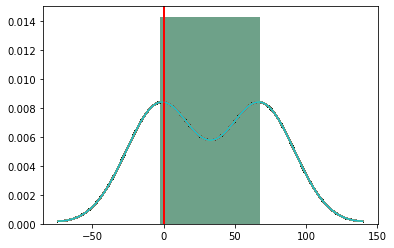

In [10]:
df = pd.read_csv("sampled_footballers.csv")
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data.head()

model_data

def plot():
    # Reporducibility.  Do not change this!
    np.random.seed(3)
    
    ### BEGIN SOLUTION
    for i in range (1000):
        a = model_data.preferred_foot
        b = ols('overall ~ a', data = model_data).fit()
        sns.distplot(b.params)
        plt.axvline(color = "red")
  
    return None
plot()



### Part G

Your findings from the randomization test are incredible; left footed players are on average 2.5 points better than their right footed counterparts!  The management is prepared to spend a lot of money to replace the team full of lefties in order to gain a slight advantage.

However, you have a sneaking suspicion this isn't the whole story.  Before management replaces the entire team, you decide to take a look at the dataset from your predictive model, called `footballer_data.csv`.  Load that data, clean it up as you did in part A, and perform another regression of overall onto preferred_foot, this time controlling for age (including the quadratic term) and interceptions.  Answer the following in a markdown cell:

* What is the p-value for the effect of being right footed?  

* What does that mean in terms of the null hypothesis?


In [11]:
df = pd.read_csv("footballer_data.csv")
model_data = df.drop(['ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'], axis = 'columns')
model_data.head()

model_data

ols('overall ~ preferred_foot + age + interceptions', data = model_data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     2193.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:44:38   Log-Likelihood:                -57605.
No. Observations:               17994   AIC:                         1.152e+05
Df Residuals:                   17990   BIC:                         1.152e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  47.0745      0.265    177.808      0.000      46.556      47.593
preferred_foot[T.Right]    -0.1785      0.105     -1.703      0.089      -0.384       0.027
age                         0.6201      0.010     63.238      0.000       0.601       0.639
interceptions               0.0803      0.002     36.513      0.000       0.076       0.085
==============================================================================
Omnibus:                      363.262   Durbin-Watson:                   0.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.797
Skew:                           0.309   Prob(JB):                     1.40e-90
Kurtosis:                       3.411   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is 0.089.

This indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.


### Part H

The club owner, Owen Owner, saw the results of your randomization test and is convinced that he should replace the whole team with left-footed players. Using your results from Part G, write an email explaining to him why this isn't a worthwhile endeavour. 



Dear Owen Owner,

Thank you for taking the time to look at my statistical analysis. Regarding the club's preference for left-footed players as a result of the randomization test you saw that the p value of the effect of being right footed is weak evidence so it against the null hypotheses, which is fail to reject the null hypothesis. This shows that the you should not replace the whole team with left-footed players. This is not worth it! 



Sincerely,

Junior Data Scientist